In [2]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#keras an tensorflow>2.0

In [5]:

import pandas_datareader as pdr
key="de45c677724473dd383b52f6e55c93c2f3ff5fbf"

In [7]:
df=pdr.get_data_tiingo('AAPL',api_key=key) #AAPL is the apple stock price prediction with name AAPL in tiingo

In [9]:
df.to_csv('AAPL.csv') #converting the AAPL to csv.

In [10]:
import pandas as pd

In [11]:
df=pd.read_csv('AAPL.csv')

In [12]:
df.head() #data is from 2016

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-08-08 00:00:00+00:00,108.37,108.37,107.16,107.52,28037220,25.403855,25.403855,25.120209,25.204600,112148880,0.0,1.0
1,AAPL,2016-08-09 00:00:00+00:00,108.81,108.94,108.01,108.23,26315204,25.506999,25.537473,25.319465,25.371036,105260816,0.0,1.0
2,AAPL,2016-08-10 00:00:00+00:00,108.00,108.90,107.76,108.71,24008505,25.317120,25.528096,25.260860,25.483557,96034020,0.0,1.0
3,AAPL,2016-08-11 00:00:00+00:00,107.93,108.93,107.85,108.52,27484506,25.300711,25.535129,25.281958,25.439018,109938024,0.0,1.0
4,AAPL,2016-08-12 00:00:00+00:00,108.18,108.44,107.78,107.78,18660434,25.359316,25.420264,25.265548,25.265548,74641736,0.0,1.0


In [13]:
df.tail() #till 2020

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1254,AAPL,2021-08-02 00:00:00+00:00,145.52,146.950,145.25,146.36,62879961,145.301263,146.729113,145.031668,146.140000,62879961,0.00,1.0
1255,AAPL,2021-08-03 00:00:00+00:00,147.36,148.045,145.18,145.81,64786618,147.138497,147.822467,144.961774,145.590827,64786618,0.00,1.0
1256,AAPL,2021-08-04 00:00:00+00:00,146.95,147.790,146.28,147.27,56368271,146.729113,147.567851,146.060120,147.048632,56368271,0.00,1.0
1257,AAPL,2021-08-05 00:00:00+00:00,147.06,147.840,146.17,146.98,46397674,146.838948,147.617775,145.950286,146.759068,46397674,0.00,1.0
1258,AAPL,2021-08-06 00:00:00+00:00,146.14,147.110,145.63,146.35,54126813,146.140000,147.110000,145.630000,146.350000,54126813,0.22,1.0


In [18]:
df1=df.reset_index()['close']

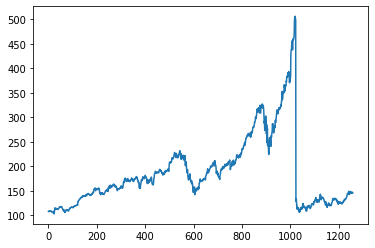

In [20]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [21]:
#LSTM is sensitive to the scale of the data, so we apply minmaxscaler

In [22]:
import numpy as np

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [38]:
print(df1) #data is converted from 0 to 1.

[[0.01300377]
 [0.01409569]
 [0.01208557]
 ...
 [0.10874528]
 [0.10901826]
 [0.10673516]]


In [39]:
#Cross validation and random seed works really well when we have normal dataset but in the case of time series we will split the dataset in a different manner( based on the date). 
#Like the day2 data will be dependent on day1 and so on.

In [40]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size

In [41]:
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:]

In [43]:
print(test_data)
print(train_data)

[[0.38244491]
 [0.38787969]
 [0.38964165]
 [0.39475382]
 [0.39415823]
 [0.40038714]
 [0.39584574]
 [0.40358845]
 [0.40691384]
 [0.40490371]
 [0.39721064]
 [0.39428231]
 [0.39371153]
 [0.40510224]
 [0.39994044]
 [0.40875025]
 [0.40728608]
 [0.39961783]
 [0.38792932]
 [0.39361227]
 [0.40314175]
 [0.41587254]
 [0.40646714]
 [0.4103385 ]
 [0.41602144]
 [0.41773377]
 [0.42689101]
 [0.43857951]
 [0.43994441]
 [0.43828172]
 [0.43897657]
 [0.43753722]
 [0.44885348]
 [0.44952353]
 [0.46351995]
 [0.46324697]
 [0.46751539]
 [0.47280127]
 [0.48942823]
 [0.48218185]
 [0.48806333]
 [0.48456422]
 [0.49647608]
 [0.51245781]
 [0.51419496]
 [0.5306482 ]
 [0.5200268 ]
 [0.51670141]
 [0.52637979]
 [0.5350407 ]
 [0.52968037]
 [0.53248461]
 [0.53628152]
 [0.53399841]
 [0.5107703 ]
 [0.5324598 ]
 [0.54896268]
 [0.54779631]
 [0.51216002]
 [0.51005063]
 [0.5353385 ]
 [0.54179075]
 [0.5511217 ]
 [0.53826683]
 [0.54203891]
 [0.53722454]
 [0.55606015]
 [0.55027794]
 [0.55047647]
 [0.53571074]
 [0.5471759 ]
 [0.53

In [44]:
##timesteps is if we have to consider the next output, how many previous day's output we need to consider. Time steps is the no. of features here.

In [51]:
import numpy
def create_dataset(dataset,time_step=1):
  dataX,dataY=[], []
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return numpy.array(dataX), numpy.array(dataY)


In [52]:
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

In [53]:
print(X_train)

[[0.01300377 0.01409569 0.01208557 ... 0.0332291  0.03506552 0.0338247 ]
 [0.01409569 0.01208557 0.01191185 ... 0.03506552 0.0338247  0.03375025]
 [0.01208557 0.01191185 0.01253226 ... 0.0338247  0.03375025 0.03149196]
 ...
 [0.22751638 0.22597776 0.2258785  ... 0.36212031 0.34782609 0.34775164]
 [0.22597776 0.2258785  0.22237939 ... 0.34782609 0.34775164 0.36140064]
 [0.2258785  0.22237939 0.22523327 ... 0.34775164 0.36140064 0.37892098]]


In [54]:
##Creating stacked LSTM model:

In [55]:
##Before building the model we should reshape the data into 3 dimensions

In [56]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [59]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1))) #the input_shape should be X_train.shape[1],1
model.add(LSTM(50,return_sequences=True)) #Adding another layer of LSTM as it is a stacked LSTM model.
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [62]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 11s 106ms/step - loss: 0.0087 - val_loss: 0.0402
Epoch 2/100
12/12 [==============================] - 0s 21ms/step - loss: 0.0024 - val_loss: 0.0262
Epoch 3/100
12/12 [==============================] - 0s 19ms/step - loss: 0.0013 - val_loss: 0.0226
Epoch 4/100
12/12 [==============================] - 0s 18ms/step - loss: 7.2286e-04 - val_loss: 0.0203
Epoch 5/100
12/12 [==============================] - 0s 18ms/step - loss: 4.9731e-04 - val_loss: 0.0209
Epoch 6/100
12/12 [==============================] - 0s 19ms/step - loss: 4.5269e-04 - val_loss: 0.0213
Epoch 7/100
12/12 [==============================] - 0s 19ms/step - loss: 4.2412e-04 - val_loss: 0.0206
Epoch 8/100
12/12 [==============================] - 0s 18ms/step - loss: 4.1889e-04 - val_loss: 0.0199
Epoch 9/100
12/12 [==============================] - 0s 18ms/step - loss: 4.0832e-04 - val_loss: 0.0199
Epoch 10/100
12/12 [==============================] - 0s 18ms/step - loss:

In [63]:
#Prediction and check the performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [64]:
#Tranform back to the original form
train_predict=scaler.inverse_transform(train_predict) #Resverse scaling to find the actua; value for train and test predicted value
test_predict=scaler.inverse_transform(test_predict)

In [65]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

181.688513846225

In [66]:
math.sqrt(mean_squared_error(y_test,test_predict))

240.8156283611789

In [67]:
#Since we have already trained the data on the trained data we will get good accuracy on trained data.

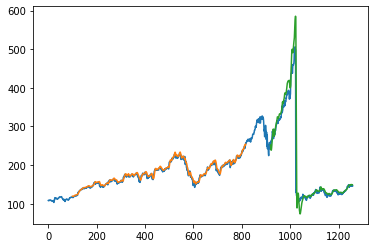

In [68]:
  ### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [69]:
#Predict the future 30 days data

In [70]:
len(test_data)

441

In [71]:
#Lets say this 441 is the 21st May data, if I have to predict 22nd May data then I have to take last 100 data

In [73]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [74]:
temp_input=list(x_input)

In [78]:
temp_input[0].tolist()

[0.05367778439547355,
 0.04318046456223945,
 0.04184038117927341,
 0.05027794322017076,
 0.048168552709946466,
 0.0420885447687116,
 0.043329362715902375,
 0.044867976970418944,
 0.045314671431407605,
 0.04161703394877908,
 0.047200714711137626,
 0.04931010522136198,
 0.05650684931506855,
 0.05727615644232681,
 0.06147012110383171,
 0.06757494540401038,
 0.0741140559857058,
 0.06975878499106619,
 0.07767520349414342,
 0.07171927734762762,
 0.07784891800675009,
 0.07700516180266037,
 0.07869267421083981,
 0.07439944411355975,
 0.07536728211236854,
 0.07149593011713323,
 0.07740222354576137,
 0.07839487790351402,
 0.0775759380583681,
 0.07556581298391907,
 0.07531764939448088,
 0.07030474488783012,
 0.0729849116537622,
 0.06134603930911259,
 0.061966448282707975,
 0.06603633114949381,
 0.06720270001985312,
 0.05886440341473104,
 0.056531665674012355,
 0.048739328965654194,
 0.05419892793329367,
 0.06035338495136,
 0.05742505459598973,
 0.05390113162596788,
 0.05350406988286682,
 0.060005

In [79]:
  # demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)


[0.11450766]
2
[0.11450766]
3
[0.11450766]
4
[0.11450766]
5
[0.11450766]
6
[0.11450766]
7
[0.11450766]
8
[0.11450766]
9
[0.11450766]
10
[0.11450766]
11
[0.11450766]
12
[0.11450766]
13
[0.11450766]
14
[0.11450766]
15
[0.11450766]
16
[0.11450766]
17
[0.11450766]
18
[0.11450766]
19
[0.11450766]
20
[0.11450766]
21
[0.11450766]
22
[0.11450766]
23
[0.11450766]
24
[0.11450766]
25
[0.11450766]
26
[0.11450766]
27
[0.11450766]
28
[0.11450766]
29
[0.11450766]
30
[0.11450766]
31
[[0.11450766026973724], [0.11450766026973724], [0.11450766026973724], [0.11450766026973724], [0.11450766026973724], [0.11450766026973724], [0.11450766026973724], [0.11450766026973724], [0.11450766026973724], [0.11450766026973724], [0.11450766026973724], [0.11450766026973724], [0.11450766026973724], [0.11450766026973724], [0.11450766026973724], [0.11450766026973724], [0.11450766026973724], [0.11450766026973724], [0.11450766026973724], [0.11450766026973724], [0.11450766026973724], [0.11450766026973724], [0.11450766026973724]

In [81]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)